## Sentiment analysis on Trump's tweets using Python 🐍
 rodolfoferro profile image Rodolfo Ferro   Sep 12, 2017 Updated on Sep 13, 2017
 (some modifications by Dave for Maryville ML class)

DESCRIPTION:
In this article we will extract twitter data using tweepy and learn how to handle it using pandas.
Do some basic statistics and visualizations with numpy, matplotlib and seaborn.
Do sentiment analysis of extracted (Trump's) tweets using textblob.

The requirements that we'll need to install are:

NumPy: This is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data.

Pandas: This is an open source library providing high-performance, easy-to-use data structures and data analysis tools.

Tweepy: This is an easy-to-use Python library for accessing the Twitter API.

Matplotlib: This is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Seaborn: This is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Textblob: This is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.

All of them are "pip installable". 

In addition to the add-ins you already have in your virtual machine, you will need to pip install tweepy, credentials, and textblob.

A very important prerequisite is the establishment of a Twitter account. See the accompanying Word document for the logistics; or watch the video referred to below


. -Dave

Now that we have all the requirements, let's get started!

1. Extracting twitter data (tweepy + pandas)

1.1. Importing our libraries

This will be the most difficult part of all the post... 😥

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following cell lines are just to read your personal Twitter parameters from a file instead of hardcoding them into your program. A still better approach would be to encrypt them in the file and decrypt them in the program. Note that readline automatically appends a newline charater, so we strip it off with the .strip('\n') function.


In [2]:
meFilename = 'me.txt'
meFile = open(meFilename,'r') # add a pathname if needed
consumer_key = str(meFile.readline()).strip('\n')
consumer_secret = meFile.readline().strip('\n')
access_token = meFile.readline().strip('\n')
access_token_secret = meFile.readline().strip('\n')
meFile.close()

Excellent! We can now just run this cell of code and go to the next subsection.

## 1.2. Creating a Twitter App

In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/. (If you don't know how to do this, you can follow this tutorial video to create an account and an application.)

From this app that we're creating we will save the following information in a script called credentials.py:

Consumer Key (API Key)
Consumer Secret (API Secret)
Access Token
Access Token Secret
An example of this script is the following:

In [3]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

The reason for creating this extra file is that we want to export only the value of this variables, but being unseen in our main code (our notebook). We are now able to consume Twitter's API. In order to do this, we will create a function to allow us our keys authentication. We will add this function in another cell of code and we will run it:

So far, so easy right? We're good to extract tweets in the next section.

## 1.3. Tweets extraction

Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets.

As it is mentioned in the title, I've chosen @realDonaldTrump as the user to extract data for a posterior analysis. Yeah, we wanna keep it interesting, LOL.

The way to extract Twitter's data is as follows:

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

We mourn the horrifying terrorist attack in NYC. All of America is praying and grieving for the families who lost t… https://t.co/gnCvusZ0Ud

....for the Middle Class. The House and Senate should consider ASAP as the process of final approval moves along. Push Biggest Tax Cuts EVER

Wouldn't it be great to Repeal the very unfair and unpopular Individual Mandate in ObamaCare and use those savings for further Tax Cuts.....

#NYCStrong #USA🇺🇸 https://t.co/6K3Xw5P87d

"Senator Chuck Schumer helping to import Europes problems" said Col.Tony Shaffer. We will stop this craziness!  @foxandfriends



With this we will have an output similar to this one, and we are able to compare the output with the Twitter account (to check if we're being consistent):

Number of tweets extracted: 200.

5 recent tweets:

On behalf of @FLOTUS Melania & myself, THANK YOU for today's update & GREAT WORK! #SouthernBaptist @SendRelief,… https://t.co/4yZCeXCt6n

I will be going to Texas and Louisiana tomorrow with First Lady. Great progress being made! Spending weekend working at White House.

Stock Market up 5 months in a row!

'President Donald J. Trump Proclaims September 3, 2017, as a National Day of Prayer' #HurricaneHarvey #PrayForTexas… https://t.co/tOMfFWwEsN

Texas is healing fast thanks to all of the great men & women who have been working so hard. But still so much to do. Will be back tomorrow!

We now have an extractor and extracted data, which is listed in the tweets variable. I must mention at this point that each element in that list is a tweet object from Tweepy, and we will learn how to handle this data in the next subsection.

## 1.4. Creating a (pandas) DataFrame

We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.

IPython's display function plots an output in a friendly way, and the headmethod of a dataframe allows us to visualize the first 5 elements of the dataframe (or the first number of elements that are passed as an argument).

So, using Python's list comprehension:

In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

This will create an output similar to this:

In [6]:
# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,We mourn the horrifying terrorist attack in NY...
1,....for the Middle Class. The House and Senate...
2,Wouldn't it be great to Repeal the very unfair...
3,#NYCStrong #USA🇺🇸 https://t.co/6K3Xw5P87d
4,"""Senator Chuck Schumer helping to import Europ..."
5,We are fighting hard for Merit Based immigrati...
6,The terrorist came into our country through wh...
7,I have just ordered Homeland Security to step ...
8,The Republican House members are working hard ...
9,"My thoughts, condolences and prayers to the vi..."


So we now have a nice table with ordered data.

An interesting thing is the number if internal methods that the tweetstructure has in Tweepy. This outputs the following list of elements:

In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [8]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

925806343855984647
2017-11-01 19:26:47
Media Studio
11068
2836
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gnCvusZ0Ud', 'expanded_url': 'https://twitter.com/i/web/status/925806343855984647', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


We're now able to order the relevant data and add it to our dataframe.

## 1.5. Adding relevant info to our dataframe

As we can see, we can obtain a lot of data from a single tweet. But not all this data is always useful for specific stuff. In our case we well just add some data to our dataframe. For this we will use Pythons list comprehension and a new column will be added to the dataframe by just simply adding the name of the content between square brackets and assign the content. The code goes as...:

In [9]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

And to display again the dataframe to see the changes we just...:

In [10]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,We mourn the horrifying terrorist attack in NY...,140,925806343855984647,2017-11-01 19:26:47,Media Studio,11068,2836
1,....for the Middle Class. The House and Senate...,140,925740081805217792,2017-11-01 15:03:29,Twitter for iPhone,34181,7528
2,Wouldn't it be great to Repeal the very unfair...,140,925739132579729420,2017-11-01 14:59:43,Twitter for iPhone,48534,10707
3,#NYCStrong #USA🇺🇸 https://t.co/6K3Xw5P87d,41,925716689064427520,2017-11-01 13:30:32,Twitter for iPad,26747,6449
4,"""Senator Chuck Schumer helping to import Europ...",126,925688931823300609,2017-11-01 11:40:14,Twitter for iPhone,55469,15817
5,We are fighting hard for Merit Based immigrati...,139,925686558304464897,2017-11-01 11:30:48,Twitter for iPhone,74328,19781
6,The terrorist came into our country through wh...,140,925684982307348480,2017-11-01 11:24:32,Twitter for iPhone,99148,29710
7,I have just ordered Homeland Security to step ...,138,925534445393928199,2017-11-01 01:26:22,Twitter for iPhone,129585,33833
8,The Republican House members are working hard ...,140,925533433597775873,2017-11-01 01:22:20,Twitter for iPhone,60441,12277
9,"My thoughts, condolences and prayers to the vi...",138,925497025386500096,2017-10-31 22:57:40,Twitter for iPhone,104518,24968


Now that we have extracted and have the data in a easy-to-handle ordered way, we're ready to do a bit more of manipulation to visualize some plots and gather some statistical data. The first part of the post is done.

## 2. Visualization and basic statistics

## 2.1. Averages and popularity

We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

From now, I'll just add some input code and the output right below the code.

To obtain the mean, using numpy:

In [11]:
# We extract the mean of lengths:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 121.99


To extract more data, we will use some pandas' functionalities:

In [12]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Subject to the receipt of further information, I will be allowing, as President, the long blocked and classified JFK FILES to be opened.
Number of likes: 213845
136 characters.

The tweet with more retweets is: 
Subject to the receipt of further information, I will be allowing, as President, the long blocked and classified JFK FILES to be opened.
Number of retweets: 70961
136 characters.



The tweet with more likes is: 
The United States condemns the terror attack in Barcelona, Spain, and will do whatever is necessary to help. Be tough & strong, we love you!
Number of likes: 222205
144 characters.

The tweet with more retweets is: 
The United States condemns the terror attack in Barcelona, Spain, and will do whatever is necessary to help. Be tough & strong, we love you!
Number of retweets: 66099
144 characters.

This is common, but it won't necessarily happen: the tweet with more likes is the tweet with more retweets. What we're doing is that we find the maximum number of likes from the 'Likes' column and the maximum number of retweets from the 'RTs' using numpy's max function. With this we just look for the index in each of both columns that satisfy to be the maximum. Since more than one could have the same number of likes/retweets (the maximum) we just need to take the first one found, and that's why we use .index[0] to assign the index to the variables favand rt. To print the tweet that satisfies, we access the data in the same way we would access a matrix or any indexed object.

We're now ready to plot some stuff. :)

## 2.2. Time series

Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

The way we do it is:

In [13]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

And if we want to plot the time series, pandas already has its own method in the object. We can plot a time series as follows:

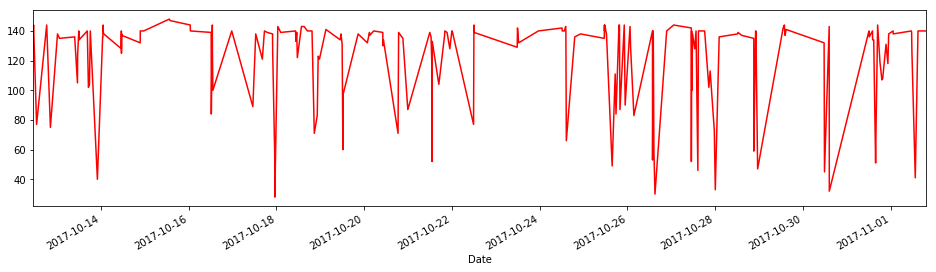

In [14]:
# Lengths along time:
tlen.plot(figsize=(16,4), color='r');

And to plot the likes versus the retweets in the same chart:

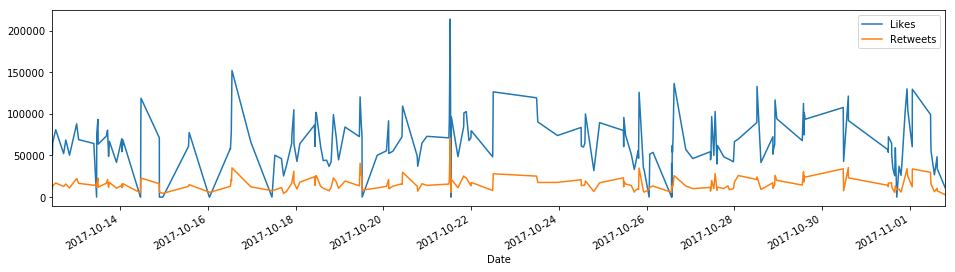

In [15]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

## 2.3. Pie charts of sources

We're almost done with this second section of the post. Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source (😱🤔). We first clean all the sources:

In [16]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Media Studio
* Twitter for iPhone
* Twitter for iPad
* Twitter Web Client


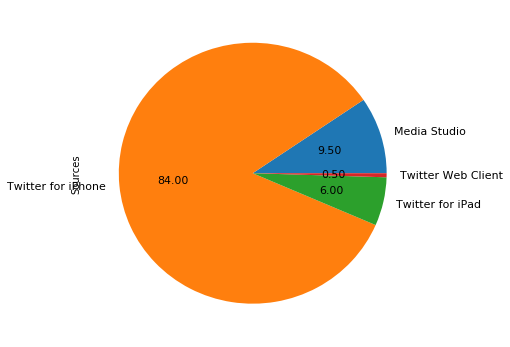

In [17]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

And we can see the percentage of tweets per source.

We can now proceed to do sentiment analysis.

## 3. Sentiment analysis

## 3.1. Importing textblob

As we mentioned at the beginning of this post, textblob will allow us to do sentiment analysis in a very simple way. We will also use the re library from Python, which is used to work with regular expressions. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. I won't explain the specific way in which the function that cleans works, since it would be extended and it might be better understood in the official redocumentation.

The code that I'm providing is:

In [18]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

With the following output, we realize that basically this twitter account has two sources:
Creation of content sources:
* Twitter for iPhone
* Media Studio

We now count the number of each source and create a pie chart. You'll notice that this code cell is not the most optimized one... Please have in mind that it was 4 in the morning when I was designing this workshop. 😅

In [19]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,We mourn the horrifying terrorist attack in NY...,140,925806343855984647,2017-11-01 19:26:47,Media Studio,11068,2836,-1
1,....for the Middle Class. The House and Senate...,140,925740081805217792,2017-11-01 15:03:29,Twitter for iPhone,34181,7528,0
2,Wouldn't it be great to Repeal the very unfair...,140,925739132579729420,2017-11-01 14:59:43,Twitter for iPhone,48534,10707,1
3,#NYCStrong #USA🇺🇸 https://t.co/6K3Xw5P87d,41,925716689064427520,2017-11-01 13:30:32,Twitter for iPad,26747,6449,0
4,"""Senator Chuck Schumer helping to import Europ...",126,925688931823300609,2017-11-01 11:40:14,Twitter for iPhone,55469,15817,0
5,We are fighting hard for Merit Based immigrati...,139,925686558304464897,2017-11-01 11:30:48,Twitter for iPhone,74328,19781,-1
6,The terrorist came into our country through wh...,140,925684982307348480,2017-11-01 11:24:32,Twitter for iPhone,99148,29710,0
7,I have just ordered Homeland Security to step ...,138,925534445393928199,2017-11-01 01:26:22,Twitter for iPhone,129585,33833,1
8,The Republican House members are working hard ...,140,925533433597775873,2017-11-01 01:22:20,Twitter for iPhone,60441,12277,-1
9,"My thoughts, condolences and prayers to the vi...",138,925497025386500096,2017-10-31 22:57:40,Twitter for iPhone,104518,24968,1


The way it works is that textblob already provides a trained analyzer (cool, right?). Textblob can work with different machine learning models used in natural language processing. If you want to train your own classifier (or at least check how it works) feel free to check the following link. It might result relevant since we're working with a pre-trained model (for which we don't not the data that was used).

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

As we can see, the last column contains the sentiment analysis (SA). We now just need to check the results.

3.2. Analyzing the results

To have a simple way to verify the results, we will count the number of neutral, positive and negative tweets and extract the percentages.

In [20]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

Now that we have the lists, we just print the percentages:

In [21]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.5%
Percentage of neutral tweets: 27.0%
Percentage of negative tweets: 22.5%


Obtaining the following result:
Percentage of positive tweets: 51.0%
Percentage of neutral tweets: 27.0%
Percentage de negative tweets: 22.0%

We have to consider that we're working only with the 200 most recent tweets from D. Trump (last updated: September 2nd.). For more accurate results we can consider more tweets. An interesting thing (an invitation to the readers) is to analyze the polarity of the tweets from different sources, it might be deterministic that by only considering the tweets from one source the polarity would result more positive/negative. Anyway, I hope this resulted interesting.

As we saw, we can extract, manipulate, visualize and analyze data in a very simple way with Python. I hope that this leaves some uncertainty in the reader, for further exploration using this tools.

It might be possible to find little mistakes in the translation of the material (I designed the workshop in Spanish, originally 😅). Please feel free to comment or suggest all that comes up to your mind. That would complement some ideas that I already have in mind for further work. 😀

I'll now leave some references for documentation and tutorials on the used libraries. Hope to hear from you!

References:

Official documentation - Tweepy.

Official documentation - NumPy.

Official tutorial - NumPy.

Official tutorial - Pandas.

Official documentation - Pandas.

Official documentation - Matplotlib.

Official tutorial - Pyplot.

Official website - Seaborn.

Official documentation - TextBlob.

Tutorial: Building a Text Classification System - TextBlob.
